In [1]:
# importar e visualizar os dados
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")
display(data)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
# verificar e limpar o dataset
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
data.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [5]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# removendo coluna desnecessaria
data = data.drop(columns='CustomerID')

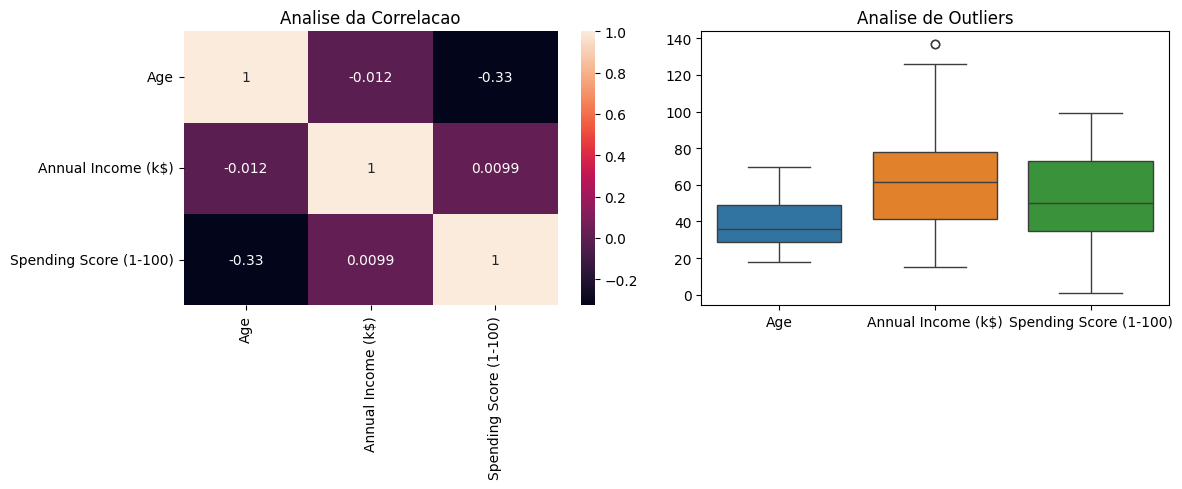

In [ ]:
# visualizando as correlacoes e os outliers

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Analise da Correlacao")

plt.subplot(1,2,2)
sns.boxplot(data)
plt.title("Analise de Outliers")

plt.tight_layout()
plt.show()

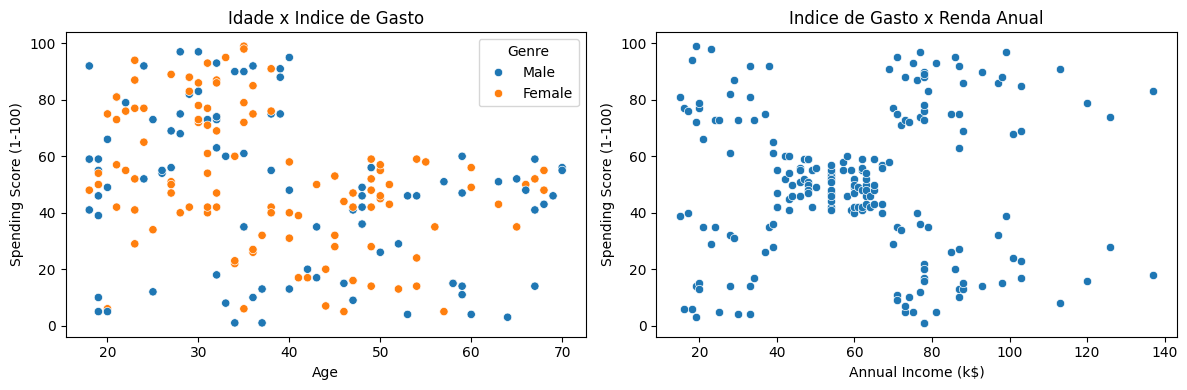

In [9]:
# analise do indice do gasto

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(data, x='Age', y='Spending Score (1-100)', hue='Genre')
plt.title("Idade x Indice de Gasto")

plt.subplot(1,2,2)
sns.scatterplot(data, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Indice de Gasto x Renda Anual")

plt.tight_layout()
plt.show()

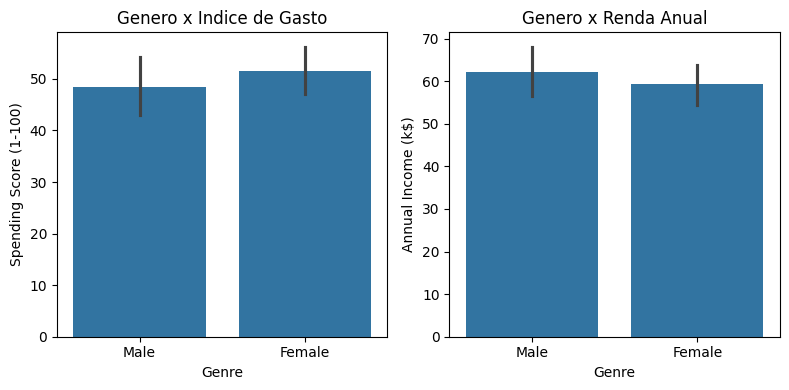

In [10]:
# analise do genero
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.barplot(data, x='Genre', y='Spending Score (1-100)')
plt.title("Genero x Indice de Gasto")

plt.subplot(1,2,2)
sns.barplot(data, x='Genre', y='Annual Income (k$)')
plt.title("Genero x Renda Anual")

plt.tight_layout()
plt.show()

In [11]:
# removendo outliers

data2 = data[data['Annual Income (k$)']<= 110]
data3 = data2[data2['Age']<30]
data4 = data3[data3['Spending Score (1-100)']<20]
display(data4)
data_preparado = data2.drop(index=[2, 134, 138, 144, 162])

,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,Female,20,16,6
134,Male,20,73,5
138,Male,19,74,10
144,Male,25,77,12
162,Male,19,81,5


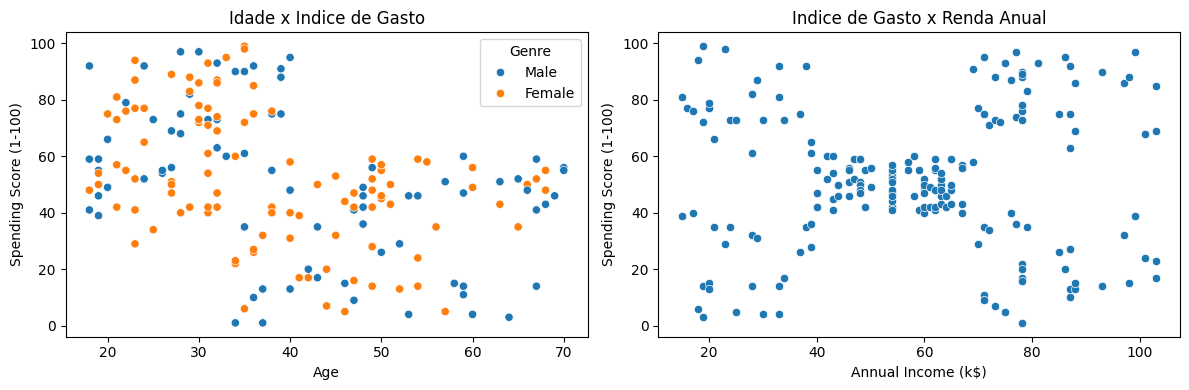

In [ ]:
# visualizacao apos normalizacao

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(data_preparado, x='Age', y='Spending Score (1-100)', hue='Genre')
plt.title("Idade x Indice de Gasto")

plt.subplot(1,2,2)
sns.scatterplot(data_preparado, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Indice de Gasto x Renda Anual")

plt.tight_layout()
plt.show()

In [13]:
data_preparado = pd.get_dummies(data_preparado, columns=['Genre'], drop_first=True)

In [ ]:
# configurando os dados de treino

X = data_preparado.drop(columns=['Genre_Male', 'Age'])

In [16]:
# remocao de outliers avancada
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
X_clean = X[outliers == 1]

In [17]:
# KMeans

from sklearn.cluster import KMeans

kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(X_clean)

KMeans(n_clusters=5)

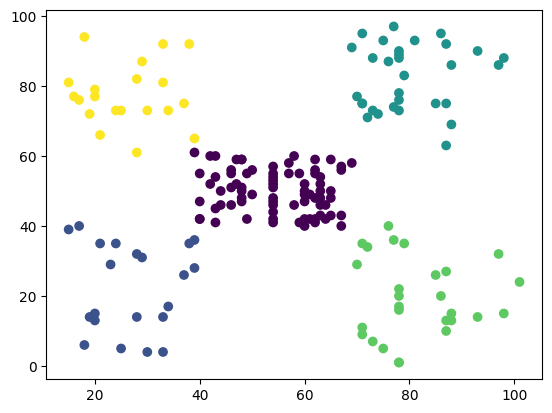

In [18]:
# visualizando o melhor agrupamento

fig, ax = plt.subplots()

ax.scatter(X_clean['Annual Income (k$)'], X_clean['Spending Score (1-100)'], c=kmeans5.labels_)

plt.show()

In [19]:
# Treinando para varios valores de k

valores_k = []
inercias = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters=i).fit(X_clean)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

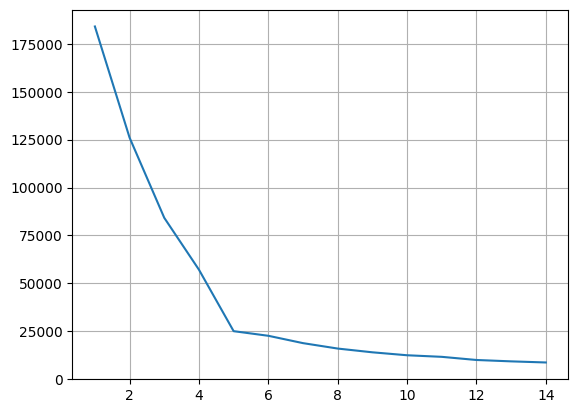

In [20]:
# visualizando o melhor valor de k de acordo com a inercia

fig, ax = plt.subplots()

ax.plot(valores_k, inercias)
plt.grid()

plt.show()

In [21]:
# avaliando o modelo de acordo com o numero de clusters

from sklearn.metrics import silhouette_score

silhouette_score(X_clean, kmeans5.labels_)

np.float64(0.5763888616182574)

In [22]:
# testando valores de clusters 

valores_k = []
s = []

for i in range (2, 11):
    kmeans = KMeans(n_clusters=i).fit(X)
    valores_k.append(i)
    s.append(silhouette_score(X, kmeans.labels_))

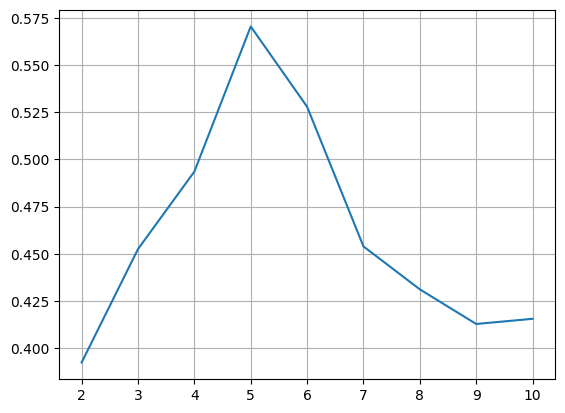

In [23]:
# visualizando o melhor valor de cluster

fig, ax = plt.subplots()

ax.plot(valores_k, s)
plt.grid()

plt.show()

In [24]:
# DBSCAN
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=9, min_samples=2).fit(X)

In [25]:
clustering.labels_

array([ 0,  1,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,  1,
        0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,  2,
        1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  5,  6,  5,
        5,  6,  5,  4,  5,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  4,  5,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  6,  5,  6,  5,  6, -1,  6,  7,  6,  5,  6,  7])

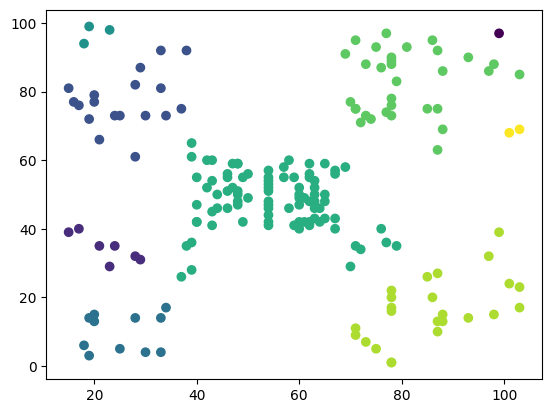

In [26]:
# visualizando a distribuicao

fig, ax = plt.subplots()

ax.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clustering.labels_)

plt.show()

In [27]:
silhouette_score(X, clustering.labels_)

np.float64(0.43476116739642073)

In [28]:
# testando todos os valores de distancia possiveis

valores_eps = []
sil = []

for i in range (1, 14):
    clustering = DBSCAN(eps=i, min_samples=2).fit(X)
    valores_eps.append(i)
    sil.append(silhouette_score(X, clustering.labels_))

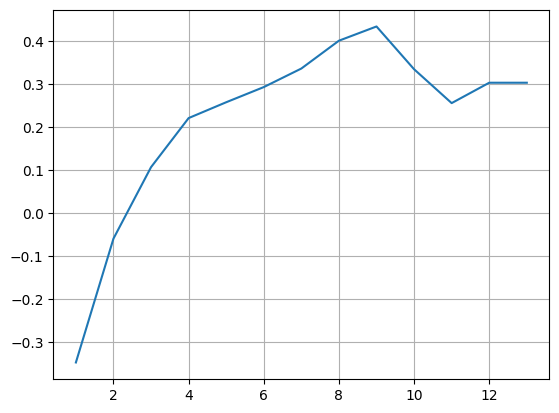

In [29]:
# visualizando a melhor distancia

fig, ax = plt.subplots()

ax.plot(valores_eps, sil)
plt.grid()

plt.show()

In [30]:
# adicionando os clusters a tabela

X_clean['clusters'] = kmeans5.labels_

C:\Users\User\AppData\Local\Temp\ipykernel_15684\1375594977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['clusters'] = kmeans5.labels_


In [31]:
# agrupando e entendendo os clusters

data.loc[X_clean.index, 'clusters'] = kmeans5.labels_
data = data.dropna()
data.groupby('clusters')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].agg(['mean', 'median', 'min', 'max'])

Annual Income (k$)                 Spending Score (1-100)             \
                       mean median min  max                   mean median min   
clusters                                                                        
0.0               54.615385   54.0  39   69              50.025641   50.0  40   
1.0               27.142857   28.0  15   39              22.476190   26.0   4   
2.0               79.774194   78.0  69   98              82.483871   86.0  63   
3.0               81.481481   78.0  70  101              19.518519   17.0   1   
4.0               26.200000   26.5  15   39              77.450000   76.5  61   

                    Age                 
         max       mean median min max  
clusters                                
0.0       61  43.128205   47.0  18  70  
1.0       40  45.523810   46.0  19  67  
2.0       97  32.709677   32.0  27  40  
3.0       40  43.666667   44.0  23  59  
4.0       94  24.300000   23.0  18  35

In [37]:
# criando rotulos de perfil para melhor entendimento

rotulos = {0.0: 'Regular',
           1.0: 'Potencial',
           2.0: 'VIP',
           3.0: 'Economico',
           4.0: 'Gastador Arriscado'}

data['Perfil'] = data['clusters'].map(rotulos)
data

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,Perfil
0,Male,19,15,39,1.0,Potencial
1,Male,21,15,81,4.0,Gastador Arriscado
3,Female,23,16,77,4.0,Gastador Arriscado
4,Female,31,17,40,1.0,Potencial
5,Female,22,17,76,4.0,Gastador Arriscado
...,...,...,...,...,...,...
180,Female,37,97,32,3.0,Economico
181,Female,32,97,86,2.0,VIP
182,Male,46,98,15,3.0,Economico
183,Female,29,98,88,2.0,VIP


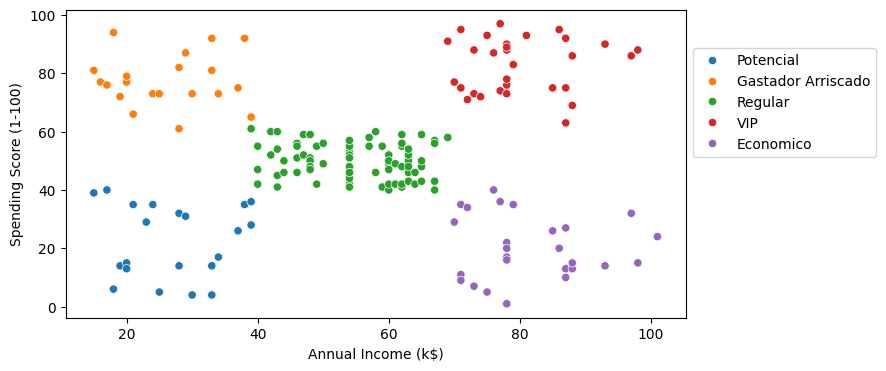

In [38]:
# visualizando cada perfil

plt.figure(figsize=(8,4))
sns.scatterplot(data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Perfil')
plt.legend(loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

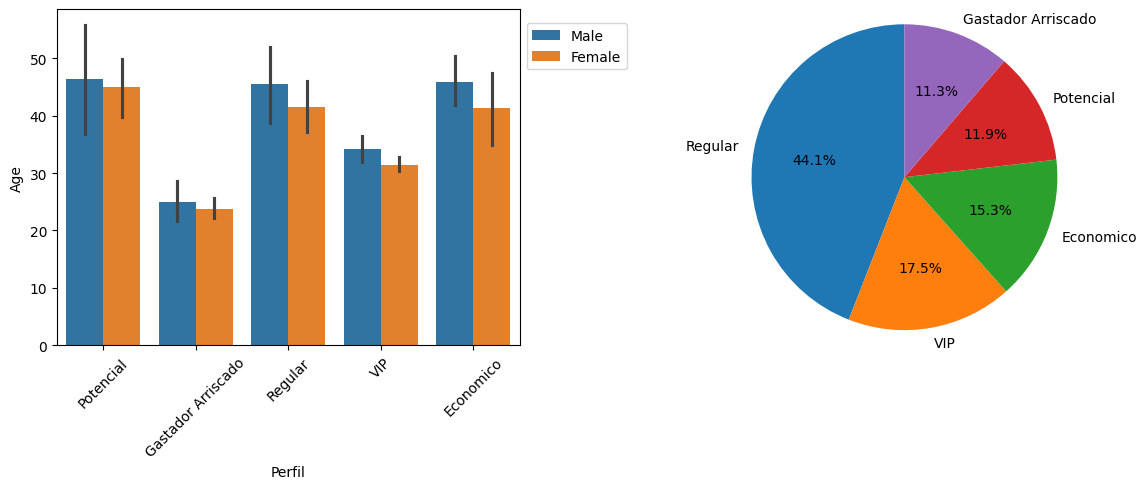

In [39]:
# distribuicao de Perfil por idade e genero

contagem = data['Perfil'].value_counts()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data, x='Perfil', y='Age', hue='Genre')
plt.xticks(rotation=45)
plt.legend(loc='lower left', bbox_to_anchor=(1,0.8))

plt.subplot(1,2,2)
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
# salvando o melhor modelo
import pickle

with open("KMeans Model.pkl", "wb") as f:
    pickle.dump(kmeans5, f)

In [ ]:
# O modelo escolhido (KMeans) teve o melhor desempenho. Após testes de hipóteses de agrupamento das colunas, a melhor combinação foi com 
# Renda Anual (Annual Income (k$)) e Índice de Gasto (Spending Score (1-100)).
# Clientes que recebem pouco e gastam muito são em media jovens.
# Os clientes econômicos, Potenciais e Regulares são em média adultos.
# Os VIP's são uma mistura dos Jovens e Adultos (em média 32 anos).
# Existem mais clientes Regulares, atingindo 45% dos Clientes, seguido dos Clientes VIP.